In [1]:
import cv2, numpy as np
import math
import time
import random
from matplotlib import pyplot as plt
%matplotlib inline
#import imutils

import qrcode

from pyzbar.pyzbar import decode #visual c 설치해야한다.
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, push_notebook


output_notebook()


def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()
    
    
def create_win(frames, scale=1.0) :    
    global myImage
    
    all = []
    for f in frames :
        if len(f.shape ) !=  3 : f = cv2.cvtColor(f, cv2.COLOR_GRAY2BGR)
        all.append(f)
    frame = np.vstack(all)
    
    fr=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA) # because Bokeh expects a RGBA image
    fr=cv2.flip(fr, -1) # because Bokeh flips vertically
    width=fr.shape[1]
    height=fr.shape[0]    

    p = figure(x_range=(0,width), y_range=(0,height), output_backend="webgl", width=int(width*scale), height=int(height*scale))    
    myImage = p.image_rgba(image=[fr], x=0, y=0, dw=width, dh=height)
    show(p, notebook_handle=True)   
    
    
def update_win(frames) :
    
    all = []
    for f in frames :
        if len(f.shape ) !=  3 : f = cv2.cvtColor(f, cv2.COLOR_GRAY2BGR)
        all.append(f)
    frame = np.vstack(all)
    
    fr=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
    fr=cv2.flip(fr, -1)
    myImage.data_source.data['image']=[fr]
    push_notebook()
    time.sleep(0.05)

Loading BokehJS ...

# ORB LAB 

len(keypoints): 500
desc.shape: (500, 32)
[ 93  89 127 161 134  90 182 224 108  96 119 162  95  30 163  41  51 213
 164 243  85 181  45 110 254 167  99  71 229  59  45  71]


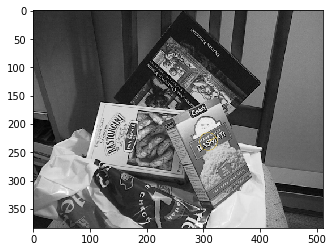

In [15]:
src = cv2.imread('./data/box_in_scene.png', cv2.IMREAD_GRAYSCALE)
#src = cv2.imread('./data/corner.png', cv2.IMREAD_GRAYSCALE)
orb = cv2.ORB_create() #코너당 원 하나
keypoints = orb.detect(src) #리스트형, 
keypoints, desc = orb.compute(src, keypoints)


print('len(keypoints):', len(keypoints))
print('desc.shape:', desc.shape) 
#코너점 , 포인터 위치를 나타냄  (포인터갯수, 32바이트) - 점하나당 32바이트(정수)의 크기를 가지고있다., 점당 32바이트로 표시된다.
#점하나를 디스크립터라고 함

keypoints = keypoints[0:1] # 0~6번째 코너 를 불러온다
dst = cv2.drawKeypoints(src, keypoints, None, (-1, -1, -1),
                       cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)


print(desc[0]) # 8비트로 keypoints[0:1] 의 값을 표시해놧다, 영상이 회전되어도 해당 값이 바뀌지 않으면 좋은 디스크립터 이다.
imshow('',dst) # 동그란 원은 어느만큼의 주변정보를 참조했는지 , 방향성도 포함 , 색깔은 랜덤하게 칠해짐


(56.400001525878906, 134.40000915527344)
[103 153 226  94 193 208  86 176 121  66 254  18 106 254  46 116  93 250
 182 194 221  47 246 227  19  62 144  75 127 173 248  70]
(121.20000457763672, 297.6000061035156)
[169  30  14  49 184 251 145 119 188 239 246 253 159   6 130 153 206  34
 206  52 189 207  97  12 236 195 122 209 202  76 175 217]
desc1.shape (453, 32)
desc2.shape (500, 32)


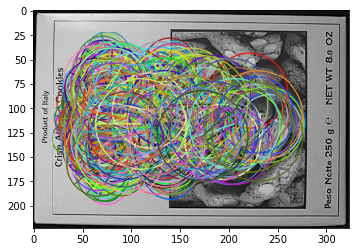

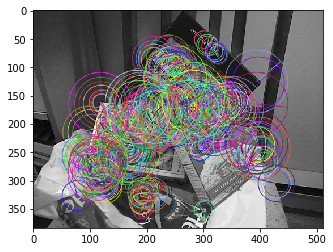

In [29]:
src1 = cv2.imread('./data/box.png', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('./data/box_in_scene.png', cv2.IMREAD_GRAYSCALE)

orb = cv2.ORB_create()
keypoints1, desc1 = orb.detectAndCompute(src1, None) #위치정보를 갖음
keypoints2, desc2 = orb.detectAndCompute(src2, None)

print(keypoints1[171].pt) # 171번 째 점의 위치를 가지고 있음
print(desc1[171]) #171번 째 8비트, 디스크립션, 32개의 값을 가지고있음

print(keypoints2[171].pt) # 171번 째 점의 위치를 가지고 있음
print(desc2[171]) #171번 째 8비트, 디스크립션, 32개의 값을 가지고있음

print('desc1.shape', desc1.shape) #desc1.shape (453, 32) , 포인터 갯수, 포인터 하나당 32바이트
print('desc2.shape', desc2.shape) #desc2.shape (500, 32)

dst1 = cv2.drawKeypoints(src1, keypoints1, None, (-1,-1,-1), # 모두 칠하라
                        cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
dst2 = cv2.drawKeypoints(src2, keypoints2, None, (-1,-1,-1), # 모두 칠하라
                        cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)


#이미지 크기가 서로 다르면 붙일 수 없음
imshow('',dst1) 
imshow('',dst2) 

In [40]:
#거리를 재는 해밍 디스턴스 라고 있음, 거리재는 방법임, 고속으로 재는방법
# 비트로 비교해서 같으면 0 다르면 1, 7과 4의 거리를 재면(서로뻄) 비트로 표시하면 100(2진수) 인데 0을 빼면 1이 남게된다 즉 거리는 1로 표기한다. 
matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING) 
matches = matcher.match(desc1,desc2)# 매칭되는 점을 표시

print(len(matches)) #매칭되는 점의 갯수
#print(matches) #2개의 디스크립션을 비교후 최소값으로 지정됨(1:1로 매핑)

# print(matches[0]) #첫번째에 매칭되는 주소를 담고있는 클래스
# print(matches[0].queryIdx) # 첫번째 매칭
# print(matches[0].trainIdx) # 매칭놈의 주소
# print(matches[0].distance) # 값이 0이 나와야 이상점

# for n in matches :
#     print(f'쿼리인덱스: {n.queryIdx - n.trainIdx  / n.distance }')

# 첫번쨰 같은 점, 계산상의 거리로는 서로 일치한다?
print(keypoints1[matches[0].queryIdx].pt)# 첫번째 이미지의 매칭포인트 점, 실제 물리적인 좌표
print(keypoints2[matches[0].queryIdx].pt)

453
(83.0, 78.0)
(309.0, 231.0)


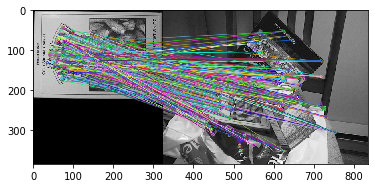

True

In [41]:
dst = cv2.drawMatches(src1, keypoints1, src2, keypoints2 , matches, None)
imshow('', dst)
cv2.imwrite('orb.png',dst)

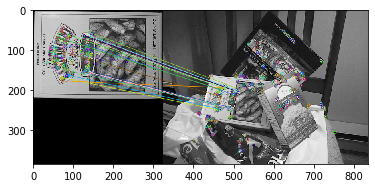

True

In [44]:
# 점들을 정렬시켜 나타내기
matches = sorted(matches, key=lambda x: x.distance) #거리로 정렬
#print(matches)
good_matches = matches[:20] #20개의 점만 나오도록 함

dst2 = cv2.drawMatches(src1, keypoints1, src2, keypoints2 , good_matches, None)

imshow('',dst2)
cv2.imwrite('dst2.png',dst2)